# Supervised Machine Learning: Classification of housing prices

The project works with the Ames housing data set (https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_ames_housing.html). The machine learning model developed below aims to classify whether houses are expensive or not. Data is loaded, prepared, mini pipelines for preprocessing are built, and different models (DecisionTree, RandomForest, KNeareast Neighbour) and specifications tested on the data.

In [581]:
#pip install scikit-learn --upgrade

In [582]:
# data wrangling
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt


#Machine learning
#from sklearnex import patch_sklearn
#patch_sklearn()

# Scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#Supervised Machine Learning

from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline #Note that make_pipeline is just a slightly more concise function than Pipeline, as it does not require you to name each step, but their behaviour is equivalent.
from sklearn import set_config

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [583]:
pd.set_option('display.max_columns', 100)

# 1. Classifying housing data

In [584]:
# Importing the data
path = 'https://raw.githubusercontent.com/jarisdata/Data_Science_Bootcamp/main/Project_5/data/housing-classification-iter6.csv'

data_raw = pd.read_csv(path)

In [585]:
# Exploring the data

#data_raw.sample(10)
#data_raw.info()
#data_raw.describe()
#data_raw.corr()
data_raw

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,BsmtFinType2,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,NaN,60,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,1,8,2003.0,548,61,0,0,0,2,2008,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,Gd,ALQ,TA,TA,20,6,8,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,1,6,1976.0,460,0,0,0,0,5,2007,2,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,Mn,GLQ,Gd,TA,60,7,5,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,1,6,2001.0,608,42,0,0,0,9,2008,3,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,Gd,No,ALQ,Gd,Gd,70,7,5,1915,1970,0.0,216,0,540,961,756,0,1717,1,0,1,0,1,7,1998.0,642,35,272,0,0,2,2006,4,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,Unf,Gd,SBrkr,Typ,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,Av,GLQ,Gd,TA,60,8,5,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,1,9,2000.0,836,84,0,0,0,12,2008,5,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,TA,TA,Gd,TA,No,Unf,TA,TA,60,6,5,1999,2000,0.0,0,0,953,953,694,0,1647,0,0,2,1,1,7,1999.0,460,40,0,0,0,8,2007,1456,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,13175,85.0,1542,3,2,0,2,349,0,0,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,No,ALQ,TA,TA,20,6,6,1978,1988,119.0,790,163,589,2073,0,0,2073,1,0,2,0,1,7,1978.0,500,0,0,0,0,2,2010,1457,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,Rec,TA,SBrkr,Min1,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,9042,66.0,1152,4,2,0,1,0,0,1,RL,Norm,GasA,Pave,Y,Stone,Ex,Gd,TA,Gd,No,GLQ,Gd,Gd,70,7,9,1941,2006,0.0,275,0,877,1188,1152,0,2340,0,0,2,0,1,9,1941.0,252,60,0,0,2500,5,2010,1458,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,9717,68.0,1078,2,0,0,1,366,0,0,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,TA,TA,Mn,GLQ,Gd,NaN,20,5,6,1950,1996,0.0,49,1029,0,1078,0,0,1078,1,0,1,0,1,5,1950.0,240,0,112,0,0,4,2010,1459,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,1Fam,1St

In [586]:
data = data_raw.copy().set_index('Id')

In [587]:
data = data.drop(['PoolQC','MiscFeature','Fence', 'Alley'], axis=1)

## 1.1 Feature selection

In [588]:
# Categorical features

cat_cols = ['BsmtQual', 'BsmtCond','ExterQual','ExterCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']

for col in cat_cols:
    data[col]=data[col].astype('category')

In [589]:
# Numerical features 

num_cols = [
    'LotArea', 
#    'LotFrontage', 
    'TotalBsmtSF', 
#    'BedroomAbvGr', 
#    'Fireplaces',
#    'PoolArea',
    'GarageCars',
    'WoodDeckSF',
#    'ScreenPorch',
#    'Expensive',
#    'MSSubClass',
    'OverallQual',
#    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
 #   'BsmtFinSF2',
 #   'BsmtUnfSF',
    '1stFlrSF',
#    '2ndFlrSF',
#    'LowQualFinSF',
    'GrLivArea',
#    'BsmtFullBath',
#    'BsmtHalfBath',
#    'FullBath',
#    'HalfBath',
#    'KitchenAbvGr',
#    'TotRmsAbvGrd',
    'GarageYrBlt',
    'GarageArea',
    'OpenPorchSF'
#    'EnclosedPorch',
#    '3SsnPorch',
#  'MiscVal',
#   'MoSold',
#    'YrSold'
]

# Columns most higly correlated with expensive: 'TotalBsmtSF','Fireplaces','GarageCars','OverallQual','MasVnrArea','1stFlrSF','GrLivArea',
# 'GarageArea', "WoodDeckSF","YearBuilt", "YearRemodAdd","BsmtFinSF1", "TotRmsAbvGrd", "GarageYrBlt", "OpenPorchSF"

In [590]:
# Object features

obj_cols = ['MSZoning', 'Condition1', 'Heating', 
            #'Street', 
            'CentralAir',
       'Foundation', 'BsmtExposure', 'BsmtFinType1',
       'LotShape', 'LandContour', 
            #'Utilities', 
            'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'SaleType', 'SaleCondition']


In [591]:
# Columns selected for analysis

select_cols = []
select_cols = num_cols + cat_cols + obj_cols

## 1.2 Building the pipeline

In [592]:
X = data[select_cols]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   LotArea        1460 non-null   int64   
 1   TotalBsmtSF    1460 non-null   int64   
 2   GarageCars     1460 non-null   int64   
 3   WoodDeckSF     1460 non-null   int64   
 4   OverallQual    1460 non-null   int64   
 5   YearBuilt      1460 non-null   int64   
 6   YearRemodAdd   1460 non-null   int64   
 7   MasVnrArea     1452 non-null   float64 
 8   BsmtFinSF1     1460 non-null   int64   
 9   1stFlrSF       1460 non-null   int64   
 10  GrLivArea      1460 non-null   int64   
 11  GarageYrBlt    1379 non-null   float64 
 12  GarageArea     1460 non-null   int64   
 13  OpenPorchSF    1460 non-null   int64   
 14  BsmtQual       1423 non-null   category
 15  BsmtCond       1423 non-null   category
 16  ExterQual      1460 non-null   category
 17  ExterCond      1460 non-null   ca

In [593]:
y = data.Expensive

In [594]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23583)

### 1.2.1 Preparing the mini pipes (numerical, categorical, object)

In [595]:
# Numeric pipe

#num_cols_select = ['TotalBsmtSF','Fireplaces','GarageCars','OverallQual','MasVnrArea','1stFlrSF','GrLivArea','GarageArea', 'ExterQual','ExterCond','BsmtQual','BsmtCond','KitchenQual']

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="median")) 

In [596]:
#  categoric pipeline for ordinal features

quality = ['NA','Po','Fa','TA','Gd','Ex'] #for cat_cols

categoric_ordinal_pipe = make_pipeline(
    (SimpleImputer(strategy="constant", fill_value="NA")),
    (OrdinalEncoder(categories=[quality]*len(cat_cols), handle_unknown='use_encoded_value', unknown_value=-1))
    )


In [597]:
# Categoric pipe for non-ordinal features

categoric_onehot_pipe = make_pipeline(
            (SimpleImputer(strategy="constant", fill_value="NA")),
            (OneHotEncoder(handle_unknown='ignore', sparse_output=False))
)

### 1.2.2 Preparing the preprocessor and minipipe

In [598]:
# Defining the preprocessor

preprocessor = make_column_transformer(
        (numeric_pipe,make_column_selector(dtype_include='number')), 
        (categoric_ordinal_pipe, make_column_selector(dtype_include='category')),
       (categoric_onehot_pipe, make_column_selector(dtype_include='object'))
)

In [599]:
# Defining the full pipeline

full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeClassifier()).set_output(transform='pandas')

# Fitting the data
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f419af807f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder'...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f419af80dc0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f419af804c0>)])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

### 1.2.3 Model selection

#### Decision Tree Classifier

In [600]:
param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)
parameters = {"dtree": search.best_params_}
scores = {"dtree" : search.best_score_}

scores, parameters

Fitting 5 folds for each of 60 candidates, totalling 300 fits


({'dtree': 0.9426543413667876},
 {'dtree': {'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
   'decisiontreeclassifier__max_depth': 4,
   'decisiontreeclassifier__min_samples_leaf': 3}})

In [601]:
# Full pipeline with best parameters

full_pipeline_bp = make_pipeline(preprocessor, 
                              DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)).set_output(transform='pandas')

# Fitting the data
full_pipeline_bp.fit(X_train, y_train)

# train and test accuracy
accuracy_score(y_train, full_pipeline_bp.predict(X_train)), accuracy_score(y_test, full_pipeline_bp.predict(X_test))

(0.964041095890411, 0.8938356164383562)

#### KNearest Neighbour

In [604]:
knn_full_pipeline = make_pipeline(preprocessor,
                                  KNeighborsClassifier()
                                 )

param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50),  
    "kneighborsclassifier__weights": ["uniform", "distance"] 
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)
knn_search.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'kneighborsclassifier__n_neighbors': 11,
 'kneighborsclassifier__weights': 'distance'}

In [605]:
# with best parameters
knn_full_pipeline_bp = make_pipeline(preprocessor,
                                  KNeighborsClassifier(n_neighbors=11, weights='distance')
                                 )

knn_full_pipeline_bp.fit(X_train, y_train)

# train and test accuracy
accuracy_score(y_train, knn_full_pipeline_bp.predict(X_train)), accuracy_score(y_test, knn_full_pipeline_bp.predict(X_test))

(1.0, 0.9075342465753424)

#### Random Forest Classifier

In [606]:
param_distributions = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
   'randomforestclassifier__max_depth':[15,16,17,18],
    'randomforestclassifier__min_samples_leaf':[1,2,3],
     'randomforestclassifier__n_estimators':[28,29,30,31,23]
}

random_full_pipeline = make_pipeline(preprocessor, 
                             RandomForestClassifier())


random_search = RandomizedSearchCV(random_full_pipeline,
                      param_distributions,
                      cv=5,
                      verbose=1)

random_search.fit(X_train, y_train)
random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'randomforestclassifier__n_estimators': 30,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_depth': 17,
 'columntransformer__pipeline-1__simpleimputer__strategy': 'median'}

In [607]:
random_full_pipeline_bp = make_pipeline(preprocessor, 
                             RandomForestClassifier(max_depth=18, n_estimators=29, min_samples_leaf=2))

random_full_pipeline_bp.fit(X_train, y_train)

accuracy_score(y_train, random_full_pipeline_bp.predict(X_train)), accuracy_score(y_test, random_full_pipeline_bp.predict(X_test))

(0.988013698630137, 0.9554794520547946)

In [608]:
param_grid = {
    
    'randomforestclassifier__max_depth': range(12,18),
    'randomforestclassifier__min_samples_leaf':[1,3,5],
     'randomforestclassifier__n_estimators':range(4,15)
}

grid_search = GridSearchCV(random_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)


grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 198 candidates, totalling 990 fits


{'randomforestclassifier__max_depth': 17,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 13}

In [609]:
# train and test accuracy
random_full_pipeline_bp2 = make_pipeline(preprocessor, 
                             RandomForestClassifier(max_depth=17, n_estimators=7, min_samples_leaf=1))
random_full_pipeline_bp2.fit(X_train, y_train)

accuracy_score(y_train, random_full_pipeline_bp2.predict(X_train)), accuracy_score(y_test, random_full_pipeline_bp2.predict(X_test))

(0.9957191780821918, 0.9452054794520548)

## 1.3 Error Analysis

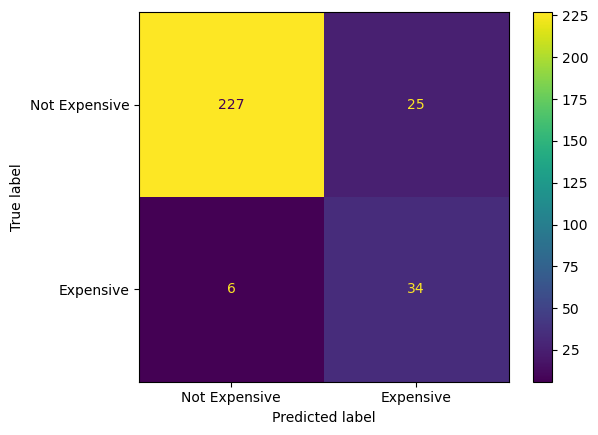

In [610]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Expensive', 'Expensive']);

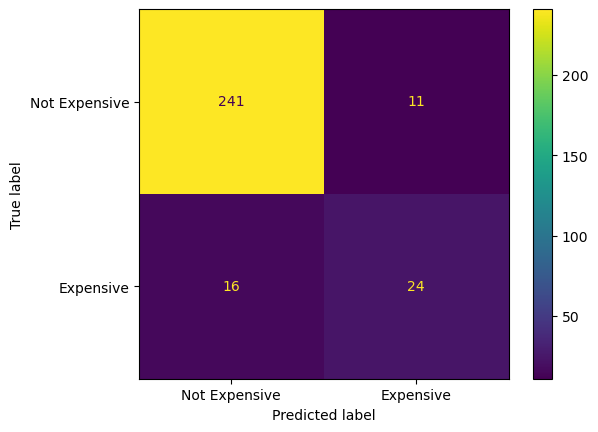

In [620]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Expensive', 'Expensive']);

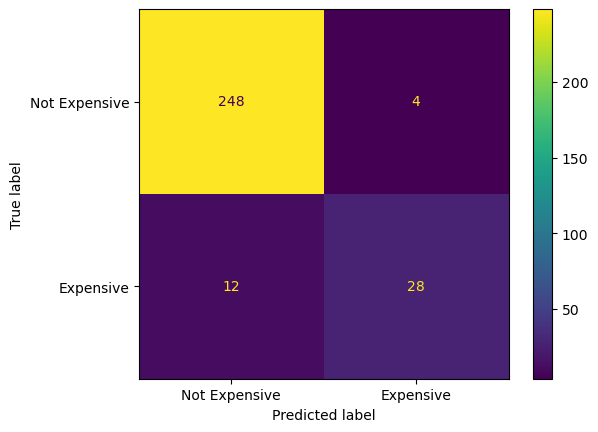

In [622]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(random_search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Expensive', 'Expensive']);

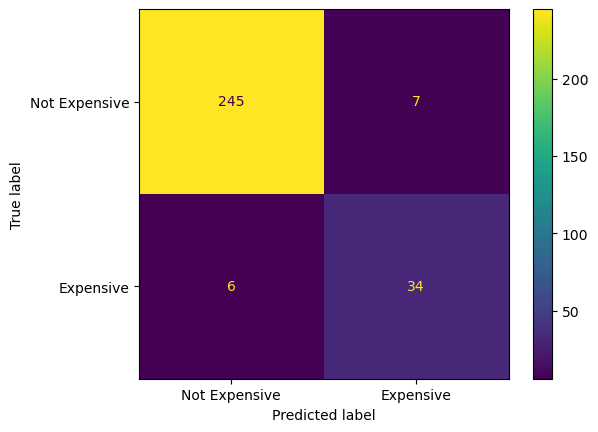

In [623]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(grid_search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Expensive', 'Expensive']);

## 1.4 Loading new test data for prediction

In [624]:
url = "https://drive.google.com/file/d/15PfmTxmavQCT-f7iY9tgwWxm9t4GRees/view"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data_new = pd.read_csv(path)


In [625]:
id_column = data_new.pop('Id')

In [626]:
data_new = data_new[select_cols]

In [627]:
y_final_predict = random_full_pipeline_bp.predict(data_new)

In [628]:
results = pd.DataFrame({'Id':id_column,'Expensive':y_final_predict})

In [629]:
results.to_csv('/home/jh23/Documents/wissenschaft/data_science/projects/07_supervised_ML/data/LearningMachineY_predict_new.csv', index=False)